# Exercise 7

# Capital Bikeshare data

## Introduction

- Capital Bikeshare dataset from Kaggle: [data](https://github.com/justmarkham/DAT8/blob/master/data/bikeshare.csv), [data dictionary](https://www.kaggle.com/c/bike-sharing-demand/data)
- Each observation represents the bikeshare rentals initiated during a given hour of a given day

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import metrics

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score

#from sklearn.cross_validation import cross_val_score

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import tree
import pydotplus
import graphviz
from IPython.display import Image

import warnings
warnings.filterwarnings('ignore')

In [2]:
# read the data and set "datetime" as the index
#url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/bikeshare.csv'

bikes = pd.read_csv('bikeshare.csv', index_col='datetime', parse_dates=True)

In [3]:
# "count" is a method, so it's best to rename that column
bikes.rename(columns={'count':'total'}, inplace=True)

In [4]:
# create "hour" as its own feature
bikes['hour'] = bikes.index.hour

In [5]:
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


In [6]:
bikes.tail()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,19
2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,20
2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,21
2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,22
2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88,23


- **hour** ranges from 0 (midnight) through 23 (11pm)
- **workingday** is either 0 (weekend or holiday) or 1 (non-holiday weekday)

# Exercise 7.1

Run these two `groupby` statements and figure out what they tell you about the data.

In [7]:
# mean rentals for each value of "workingday"
bikes.groupby('workingday').total.mean()

workingday
0    188.506621
1    193.011873
Name: total, dtype: float64

- La media de los alquileres de la bicicleta para los diferentes dias no presenta mayor diferencia. Sin embargo, se observa que para los dias laborales se alquilan más bicicletas.

In [8]:
# mean rentals for each value of "hour"
bikes.groupby('hour').total.mean()

hour
0      55.138462
1      33.859031
2      22.899554
3      11.757506
4       6.407240
5      19.767699
6      76.259341
7     213.116484
8     362.769231
9     221.780220
10    175.092308
11    210.674725
12    256.508772
13    257.787281
14    243.442982
15    254.298246
16    316.372807
17    468.765351
18    430.859649
19    315.278509
20    228.517544
21    173.370614
22    133.576754
23     89.508772
Name: total, dtype: float64

- Las horas que en promedio tienen mayor numero de alquiler de bicicletas son las 17:00 y 18:00. Adicionalmente se evidencia que en promedio se aumneta el número de alquieleres a partir de la hora 7:00, con un incremento espcial en la hora 8:00.

# Exercise 7.2

Run this plotting code, and make sure you understand the output. Then, separate this plot into two separate plots conditioned on "workingday". (In other words, one plot should display the hourly trend for "workingday=0", and the other should display the hourly trend for "workingday=1".)

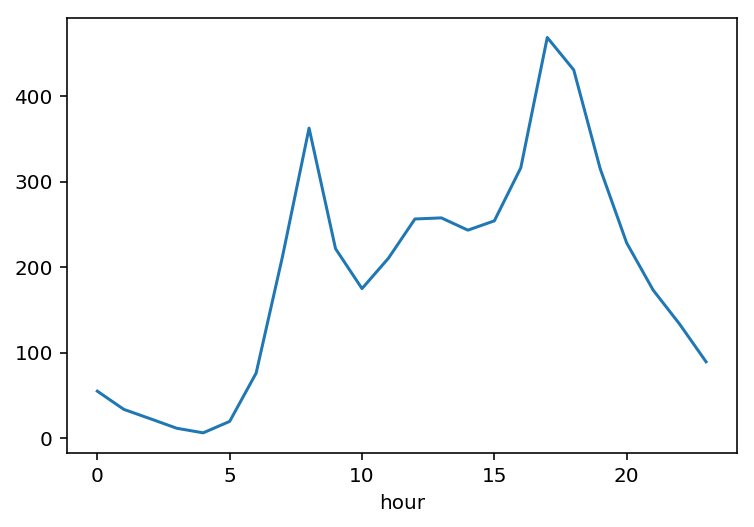

In [9]:
# mean rentals for each value of "hour"
bikes.groupby('hour').total.mean().plot()

Plot for workingday == 0 and workingday == 1

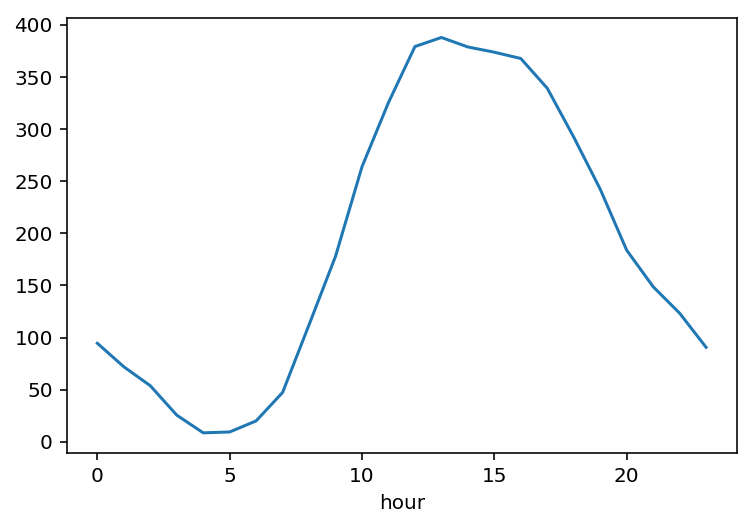

In [10]:
# hourly rental trend for "workingday=0"
bikes[bikes.workingday==0].groupby('hour').total.mean().plot()

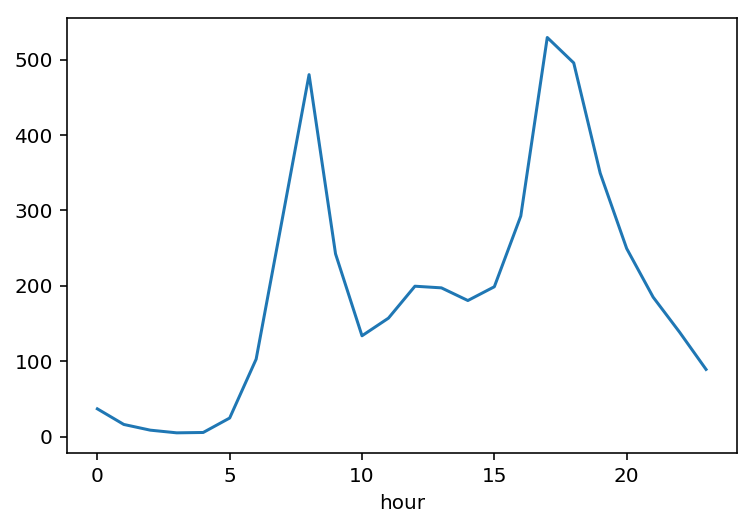

In [11]:
# hourly rental trend for "workingday=1"
bikes[bikes.workingday==1].groupby('hour').total.mean().plot()

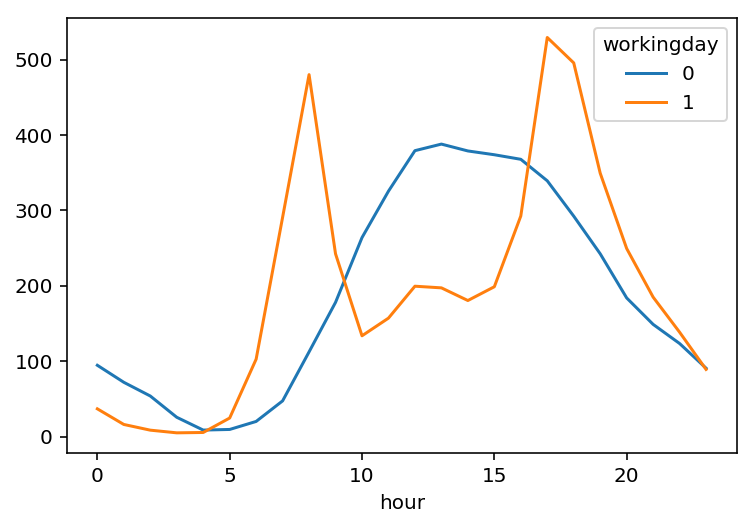

In [12]:
# combine the two plots
bikes.groupby(['hour', 'workingday']).total.mean().unstack().plot()

- Existen horas picos entre las 7:00 am y las 5:00 pm debidos a los días laborales. Y para los días no laborales el incremente se presenta entre las 11:00 am y las 4:00 pm.

# Exercise 7.3

Fit a linear regression model to the entire dataset, using "total" as the response and "hour" and "workingday" as the only features. Then, print the coefficients and interpret them. What are the limitations of linear regression in this instance?

- Se crea X y y

In [13]:
X = bikes[['hour', 'workingday']]
y = bikes['total']

 - Creando el set de test y train

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

- Estandarizando

In [15]:
scaler = StandardScaler()
X_train = X_train.astype(float)
X_test = X_test.astype(float)

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

- Entrenando el modelo

In [16]:
linreg = LinearRegression().fit(X_train, y_train)
y_pred = linreg.predict(X_test)

- Analizando los coeficientes

In [17]:
linreg.coef_

array([72.65450841,  2.42548219])

- El coeficiente de 'hour', es aquel que mayor afectación tiene sobre el modelo. No se puede establecer una relación lineal entre las horas y el tipo de día en que se realiza el alquiler de bicicletas, debido a los picos que se presentas en diferentes horas del día.

In [18]:
print("RMSE=", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE= 169.81423310428625


# Exercice 7.4

Create a Decision Tree to forecast "total" by manually iterating over the features "hour" and "workingday". The algorithm must at least have 6 end nodes.

In [19]:
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


In [20]:
for workingday in range(0, 1):

    bikes['pred'] = bikes.loc[bikes.workingday<workingday, 'total'].mean()
    bikes.loc[bikes.workingday>=workingday, 'pred'] = bikes.loc[bikes.workingday>=workingday, 'total'].mean()

    print(workingday, (((bikes['total'] - bikes['pred'])**2).mean()) ** 0.5)

0 181.13613357426559


In [21]:
for hour in range(0, 23):

    bikes['pred'] = bikes.loc[bikes.hour<hour, 'total'].mean()
    bikes.loc[bikes.hour>=hour, 'pred'] = bikes.loc[bikes.hour>=hour, 'total'].mean()

    print(hour, (((bikes['total'] - bikes['pred'])**2).mean()) ** 0.5)

0 181.13613357426559
1 178.88076030483188
2 175.61266024769844
3 171.5350162975495
4 166.57596568309665
5 160.50832916137819
6 154.10979930228774
7 150.22560060405686
8 153.86972728404965
9 163.39221989024873
10 165.25615391972227


11 165.00286510437286
12 165.84659205524616
13 168.04756019190663
14 169.94604099621912
15 171.14521362143498
16 172.47403631919644
17 175.2235068708682


18 179.8668827954335


19 181.12705316323988
20 180.44126246625746
21 179.7297936918192
22 179.51222338944388


- La hora 7 es la que presenta el menor RMSE, se toma este punto para crear la primera ramificación del arbol.

In [22]:
bikes_izq = bikes.loc[bikes.hour<7].copy()

In [23]:
bikes_izq.hour.unique()

array([0, 1, 2, 3, 4, 5, 6])

In [24]:
def error_hour(bikes, hour):
    bikes['pred'] = bikes.loc[bikes.hour<hour, 'total'].mean()
    bikes.loc[bikes.hour>=hour, 'pred'] = bikes.loc[bikes.hour>=hour, 'total'].mean()
    print ((((bikes['total'] - bikes['pred'])**2).mean()) ** 0.5)

In [25]:
def error_workingday(bikes, workingday):
    bikes['pred'] = bikes.loc[bikes.workingday<workingday, 'total'].mean()
    bikes.loc[bikes.workingday>=workingday, 'pred'] = bikes.loc[bikes.workingday>=workingday, 'total'].mean()
    print ((((bikes['total'] - bikes['pred'])**2).mean()) ** 0.5)

In [26]:
for hour in bikes_izq.hour.unique():
    print('Hour ',hour)
    error_hour(bikes_izq, hour)

print('----------------------------------')

for workingday in [0,1]:
    print('workingday ',workingday)
    error_workingday(bikes_izq, workingday)

Hour  0
39.56714516247788
Hour  1
38.46175887834954
Hour  2
38.827302356307555
Hour  3
39.34538405588436
Hour  4
39.534113157382144
Hour  5
38.30948200125475
Hour  6
35.24426946227024
----------------------------------
workingday  0
39.56714516247788
workingday  1
39.18093811435608


In [27]:
bikes_izq_izq = bikes_izq.loc[bikes.hour<6].copy()

In [28]:
bikes_izq_izq.hour.unique()

array([0, 1, 2, 3, 4, 5])

In [29]:
for hour in bikes_izq_izq.hour.unique():
    print('Hour ',hour)
    error_hour(bikes_izq_izq, hour)

print('----------------------------------')

for workingday in [0,1]:
    print('workingday ',workingday)
    error_workingday(bikes_izq_izq, workingday)

Hour  0
30.753540668567577
Hour  1
27.614237275202125
Hour  2
27.46590337533093
Hour  3
28.171307299972213
Hour  4
29.557984864071205
Hour  5


30.657024737799514
----------------------------------
workingday  0
30.753540668567577
workingday  1
27.86868086542797


In [30]:
bikes_izq_izq_izq = bikes_izq_izq.loc[bikes.hour<2].copy()

In [31]:
for hour in bikes_izq_izq_izq.hour.unique():
    print('Hour ',hour)
    error_hour(bikes_izq_izq_izq, hour)

print('----------------------------------')

for workingday in [0,1]:
    print('workingday ',workingday)
    error_workingday(bikes_izq_izq_izq, workingday)

Hour  0
40.538959119681785
Hour  1
39.117819478677326
----------------------------------
workingday  0
40.538959119681785
workingday  1
30.694005806108365


In [32]:
bikes_izq_izq_izq_izq = bikes_izq_izq_izq.loc[bikes.workingday==0].copy()

In [33]:
for hour in bikes_izq_izq_izq_izq.hour.unique():
    print('Hour ',hour)
    error_hour(bikes_izq_izq_izq_izq, hour)

Hour  0
42.685635151369894
Hour  1
41.16560620668486


In [34]:
bikes_izq_izq_izq_der= bikes_izq_izq_izq.loc[bikes.workingday==1].copy()

In [35]:
for hour in bikes_izq_izq_izq_der.hour.unique():
    print('Hour ',hour)
    error_hour(bikes_izq_izq_izq_der, hour)

Hour  0
23.018939000078593
Hour  1
20.55355800490316


In [36]:
bikes_izq_izq_der = bikes_izq_izq.loc[bikes_izq_izq.hour>=2].copy()

In [37]:
for hour in bikes_izq_izq_der.hour.unique():
    print('Hour ',hour)
    error_hour(bikes_izq_izq_der, hour)

print('----------------------------------')

for workingday in [0,1]:
    print('workingday ',workingday)
    error_workingday(bikes_izq_izq_der, workingday)

Hour  2
17.29426553034504
Hour  3
16.717555760255358
Hour  4
17.162529778774573
Hour  5
17.093928272746314
----------------------------------
workingday  0
17.29426553034504
workingday  1
16.13723627658292


In [38]:
bikes_izq_izq_der_izq = bikes_izq_izq_der.loc[bikes_izq_izq_der.workingday==0].copy()

In [39]:
for hour in bikes_izq_izq_der_izq.hour.unique():
    print('Hour ',hour)
    error_hour(bikes_izq_izq_der_izq, hour)

Hour  2
23.589552753575976
Hour  3
16.377550739536485
Hour  4
17.938809770108577
Hour  5
21.98837760722226


In [40]:
bikes_izq_izq_der_izq_izq = bikes_izq_izq_der_izq.loc[bikes_izq_izq_der_izq.hour<3].copy()

In [41]:
for hour in bikes_izq_izq_der_izq_izq.hour.unique():
    print('Hour ',hour)
    error_hour(bikes_izq_izq_der_izq_izq, hour)

Hour  2
25.10578138957994


In [42]:
bikes_izq_izq_der_izq_der = bikes_izq_izq_der_izq.loc[bikes_izq_izq_der_izq.hour>=3].copy()

In [43]:
for hour in bikes_izq_izq_der_izq_der.hour.unique():
    print('Hour ',hour)
    error_hour(bikes_izq_izq_der_izq_der, hour)

Hour  3
12.169313609764815
Hour  4
9.323801035579761
Hour  5
11.627851511960445


In [44]:
bikes_izq_izq_der_izq_der_izq = bikes_izq_izq_der_izq_der.loc[bikes_izq_izq_der_izq_der.hour<4].copy()

In [45]:
for hour in bikes_izq_izq_der_izq_der_izq.hour.unique():
    print('Hour ',hour)
    error_hour(bikes_izq_izq_der_izq_der_izq, hour)

Hour  3
13.359824305670907


In [46]:
bikes_izq_izq_der_izq_der_der = bikes_izq_izq_der_izq_der.loc[bikes_izq_izq_der_izq_der.hour>=4].copy()

In [47]:
for hour in bikes_izq_izq_der_izq_der_der.hour.unique():
    print('Hour ',hour)
    error_hour(bikes_izq_izq_der_izq_der_der, hour)

Hour  4
6.402964021235215
Hour  5
6.389554010639077


In [48]:
bikes_izq_izq_der_der = bikes_izq_izq_der.loc[bikes_izq_izq_der.workingday==1].copy()

In [49]:
for hour in bikes_izq_izq_der_der.hour.unique():
    print('Hour ',hour)
    error_hour(bikes_izq_izq_der_der, hour)

Hour  4
10.05537659422398
Hour  5
7.417589653876195
Hour  2
10.904795521560734
Hour  3
10.803514040463659


In [50]:
bikes_izq_izq_der_der_izq = bikes_izq_izq_der_der.loc[bikes_izq_izq_der_der.hour<5].copy()

In [51]:
for hour in bikes_izq_izq_der_der_izq.hour.unique():
    print('Hour ',hour)
    error_hour(bikes_izq_izq_der_der_izq, hour)

Hour  4
5.010258835897964
Hour  2
5.050424241777772
Hour  3
4.800846999162697


In [52]:
bikes_izq_izq_der_der_izq_izq = bikes_izq_izq_der_der_izq.loc[bikes_izq_izq_der_der_izq.hour<3].copy()

In [53]:
for hour in bikes_izq_izq_der_der_izq_izq.hour.unique():
    print('Hour ',hour)
    error_hour(bikes_izq_izq_der_der_izq_izq, hour)

Hour  2
6.946871752324288


In [54]:
bikes_izq_izq_der_der_izq_der = bikes_izq_izq_der_der_izq.loc[bikes_izq_izq_der_der_izq.hour>=3].copy()

In [55]:
for hour in bikes_izq_izq_der_der_izq_der.hour.unique():
    print('Hour ',hour)
    error_hour(bikes_izq_izq_der_der_izq_der, hour)

Hour  4
3.1418136794862614
Hour  3
3.1506221966797505


In [56]:
bikes_der = bikes.loc[bikes.hour>=7].copy()

In [57]:
for hour in bikes_der.hour.unique():
    print('Hour ',hour)
    error_hour(bikes_der, hour)

print('----------------------------------')

for workingday in [0,1]:
    print('workingday ',workingday)
    error_workingday(bikes_der, workingday)

Hour  7
176.28835016242152
Hour  8
175.9626543129351
Hour  9
175.9026463917815
Hour  10
176.22897287604295
Hour  11
176.1454556323947
Hour  12


175.84813796801208
Hour  13
175.89260116453647
Hour  14
175.92916682007098
Hour  15
175.83965773793437
Hour  16
175.82530141788737
Hour  17
176.19523832330185
Hour  18
175.115249088561
Hour  19
170.74027110094912
Hour  20
167.37168785994314
Hour  21
166.69864069956597
Hour  22


168.20616961120874
Hour  23
171.30096203191567
----------------------------------
workingday  0
176.28835016242152
workingday  1
176.2245057824691


In [58]:
bikes_der_izq = bikes_der.loc[bikes_der.hour<21].copy()

In [59]:
for hour in bikes_der_izq.hour.unique():
    print('Hour ',hour)
    error_hour(bikes_der_izq, hour)

print('----------------------------------')

for workingday in [0,1]:
    print('workingday ',workingday)
    error_workingday(bikes_der_izq, workingday)

Hour  7
180.02864972098826
Hour  8
178.99715046718114
Hour  9


180.0152330686221
Hour  10
179.8185136914361
Hour  11
178.3022430628963
Hour  12
176.75986364527014
Hour  13
176.22253234052977
Hour  14
175.53287560508187
Hour  15
174.04175510396522
Hour  16


172.4267605458089
Hour  17
173.07581303410245
Hour  18
178.6648712641945
Hour  19
179.97602519154125
Hour  20
179.4031992036802
----------------------------------
workingday  0
180.02864972098826
workingday  1


179.9813181571363


In [60]:
bikes_der_izq_izq = bikes_der_izq.loc[bikes_der_izq.hour<16].copy()

In [61]:
for hour in bikes_der_izq_izq.hour.unique():
    print('Hour ',hour)
    error_hour(bikes_der_izq_izq, hour)

print('----------------------------------')

for workingday in [0,1]:
    print('workingday ',workingday)
    error_workingday(bikes_der_izq_izq, workingday)

Hour  7
156.72440257472772
Hour  8
156.34522917916382


Hour  9
154.95247130836913
Hour  10
155.9558851652572
Hour  11
156.72292931961604
Hour  12


156.51433435445483
Hour  13
156.62481542315632
Hour  14
156.70229619927898
Hour  15
156.68163321041817
----------------------------------
workingday  0
156.72440257472772
workingday  1
155.56614105625243


In [62]:
bikes_der_izq_izq_izq = bikes_der_izq_izq.loc[bikes_der_izq_izq.hour<9].copy()

In [63]:
for hour in bikes_der_izq_izq_izq.hour.unique():
    print('Hour ',hour)
    error_hour(bikes_der_izq_izq_izq, hour)

print('----------------------------------')

for workingday in [0,1]:
    print('workingday ',workingday)
    error_workingday(bikes_der_izq_izq_izq, workingday)

Hour  7
212.2106434047415
Hour  8


198.58089279731993
----------------------------------
workingday  0
212.2106434047415
workingday  1
157.35875224927153


In [64]:
bikes_der_izq_izq_izq_izq = bikes_der_izq_izq_izq.loc[bikes_der_izq_izq_izq.workingday==0].copy()

In [65]:
for hour in bikes_der_izq_izq_izq.hour.unique():
    print('Hour ',hour)
    error_hour(bikes_der_izq_izq_izq, hour)

Hour  7


212.2106434047415
Hour  8
198.58089279731993


In [66]:
bikes_der_izq_izq_izq_der = bikes_der_izq_izq_izq.loc[bikes_der_izq_izq_izq.workingday==1].copy()

In [67]:
for hour in bikes_der_izq_izq_izq_der.hour.unique():
    print('Hour ',hour)
    error_hour(bikes_der_izq_izq_izq_der, hour)

Hour  7
183.9040791564587
Hour  8
157.69071575913554


In [68]:
bikes_der_izq_izq_der = bikes_der_izq_izq.loc[bikes_der_izq_izq.hour>=9].copy()

In [69]:
for hour in bikes_der_izq_izq_der.hour.unique():
    print('Hour ',hour)
    error_hour(bikes_der_izq_izq_der, hour)

print('----------------------------------')

for workingday in [0,1]:
    print('workingday ',workingday)
    error_workingday(bikes_der_izq_izq_der, workingday)

Hour  9


134.2058333547015
Hour  10
134.14848696320013
Hour  11
132.579867100665
Hour  12
131.85981294765384
Hour  13
133.03061844174263
Hour  14
133.74941120507904
Hour  15


133.87939986632443
----------------------------------
workingday  0
134.2058333547015
workingday  1
117.3708930119803


In [70]:
bikes_der_izq_izq_der_izq = bikes_der_izq_izq_der.loc[bikes_der_izq_izq_der.workingday==0].copy()

In [71]:
for hour in bikes_der_izq_izq_der_izq.hour.unique():
    print('Hour ',hour)
    error_hour(bikes_der_izq_izq_der_izq, hour)

Hour  9
164.16293043170097
Hour  10
152.5233760892614
Hour  11
149.91376821059404
Hour  12
152.23558921349834
Hour  13
157.50307519177008
Hour  14


161.1406907426295
Hour  15
163.03469737968572


In [72]:
bikes_der_izq_izq_der_der = bikes_der_izq_izq_der.loc[bikes_der_izq_izq_der.workingday==1].copy()

In [73]:
for hour in bikes_der_izq_izq_der_der.hour.unique():
    print('Hour ',hour)
    error_hour(bikes_der_izq_izq_der_der, hour)

Hour  9
87.32380064259114
Hour  10
84.35439986070521
Hour  11
87.32144036452522
Hour  12
86.953415301041
Hour  13
87.21076022658939
Hour  14
87.30866533128561
Hour  15


87.19289554311982


#### Graficando el arbol manual

![Tree manual for Bikes data](https://github.com/amosqueraf/ML/raw/master/tree_bikes_manual.png)

# Exercise 7.5

Train a Decision Tree using scikit-learn. Comment about the performance of the models.

In [74]:
#feature_cols = ['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'hour']
feature_cols = ['hour', 'workingday']
X = bikes[feature_cols]
y = bikes.total

In [75]:
treereg = DecisionTreeRegressor(max_depth=6, random_state=1).fit(X, y)
treereg

DecisionTreeRegressor(criterion='mse', max_depth=6, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1, splitter='best')

In [76]:
scores = cross_val_score(treereg, X, y, cv=14, scoring='neg_mean_squared_error')
np.mean(np.sqrt(-scores))

106.30130069442295

- Usando cross_validate para evaluar multiples metricas

In [77]:
scores = cross_validate(treereg, X, y, cv=3, scoring=('r2', 'neg_mean_squared_error'), return_train_score=True)
print(scores['test_neg_mean_squared_error'])
print(scores['train_r2'])

[-18136.65700925  -7928.00841485 -26522.34107139]
[0.73475712 0.62934238 0.65604184]


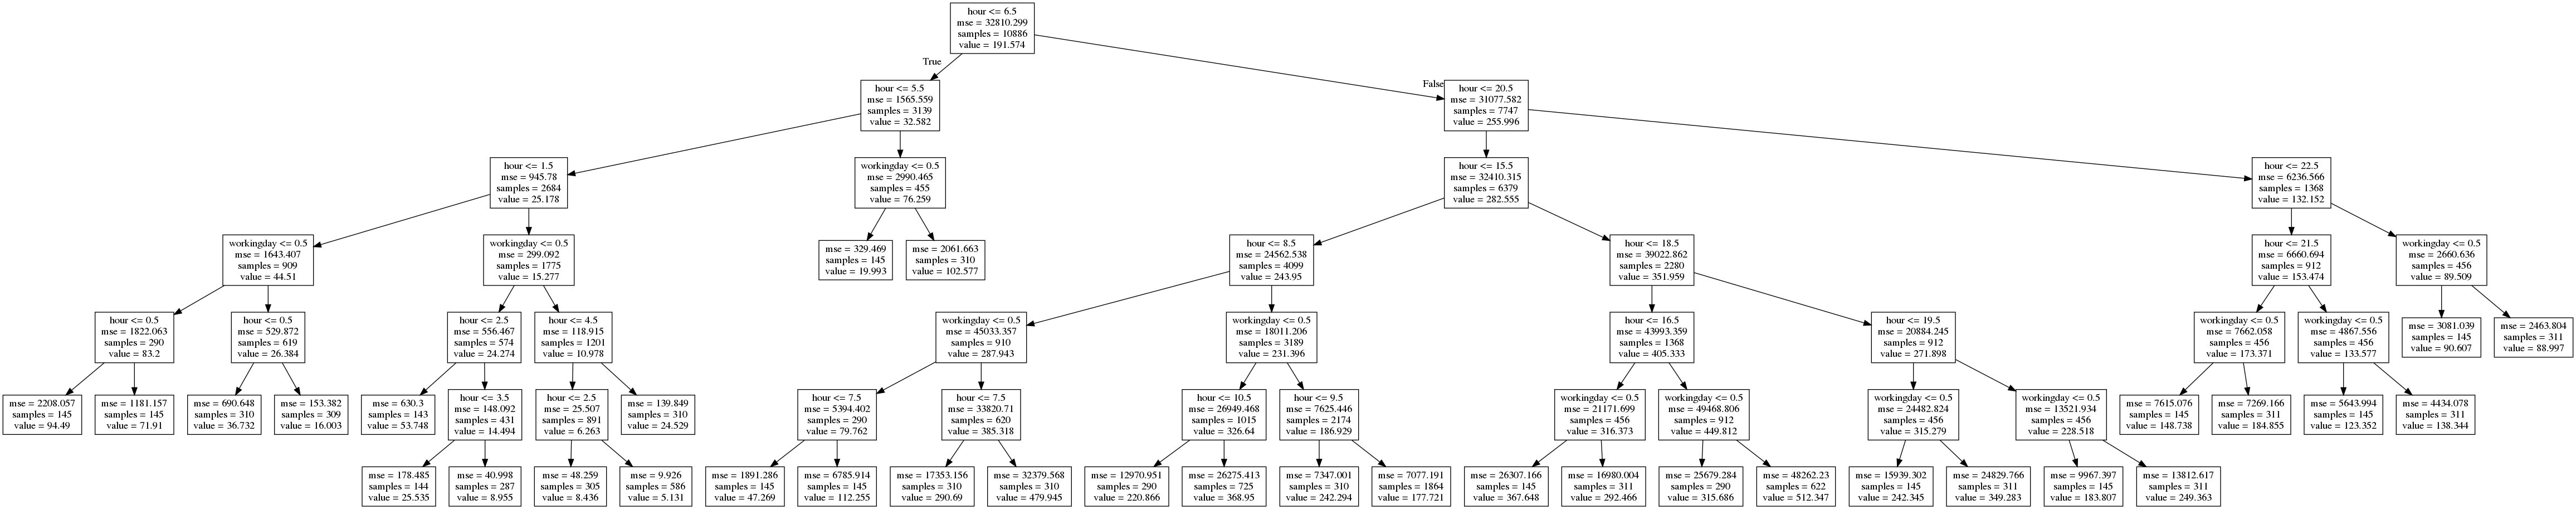

In [78]:
dot_data = tree.export_graphviz(treereg, out_file=None,feature_names =X.columns)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [79]:
# create a Graphviz file
export_graphviz(treereg, out_file='tree_bikes.dot', feature_names=feature_cols)

In [80]:
max_depth_range = range(1, 8)

In [81]:
RMSE_scores = []

In [82]:
for depth in max_depth_range:
    treereg = DecisionTreeRegressor(max_depth=depth, random_state=1)
    MSE_scores = cross_val_score(treereg, X, y, cv=14, scoring='neg_mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))

Text(0,0.5,'RMSE (lower is better)')

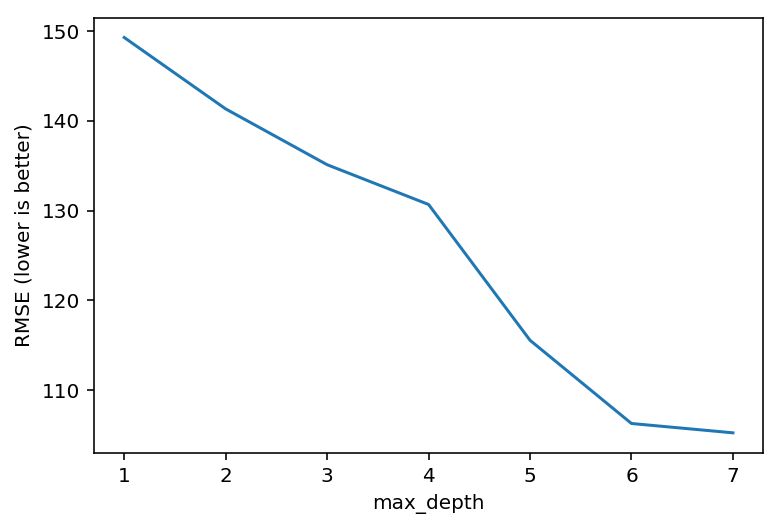

In [83]:
# plot max_depth (x-axis) versus RMSE (y-axis)
plt.plot(max_depth_range, RMSE_scores)
plt.xlabel('max_depth')
plt.ylabel('RMSE (lower is better)')

- A mayor profundidad del arbol el RMSE disminuye.

In [84]:
treereg = DecisionTreeRegressor(max_depth=1, random_state=1).fit(X, y)
treereg
pd.DataFrame({'feature':feature_cols, 'importance':treereg.feature_importances_})

,feature,importance
0,hour,1.0
1,workingday,0.0


- Se evidencia que la característica de hora presenta mayor importancia en el modelo que la variable workingday